In [1]:
import numpy as np
import pandas as pd

url = "https://www.sharkattackfile.net/spreadsheets/GSAF5.xls"
shark_data = pd.read_excel(url)

In [2]:
# Head of original data
shark_data.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Shape of original data
initial_data_shape = shark_data.shape
initial_data_shape

(6969, 23)

In [4]:
# Columns of original data
shark_data.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [5]:
# Verifing how USA is written in the dataframe
shark_data.Country.unique()

array(['AUSTRALIA', 'USA', 'INDIA', 'TRINIDAD', 'BAHAMAS', 'SOUTH AFRICA',
       'MEXICO', 'NEW ZEALAND', 'EGYPT', 'Mexico', 'BELIZE',
       'PHILIPPINES', 'Coral Sea', 'SPAIN', 'PORTUGAL', 'SAMOA',
       'COLOMBIA', 'ECUADOR', 'FRENCH POLYNESIA', 'NEW CALEDONIA',
       'TURKS and CaICOS', 'CUBA', 'BRAZIL', 'SEYCHELLES', 'ARGENTINA',
       'FIJI', 'MeXICO', 'Maldives', 'South Africa', 'ENGLAND', 'JAPAN',
       'INDONESIA', 'JAMAICA', 'MALDIVES', 'THAILAND', 'COLUMBIA',
       'COSTA RICA', 'New Zealand', 'British Overseas Territory',
       'CANADA', 'JORDAN', 'ST KITTS / NEVIS', 'ST MARTIN',
       'PAPUA NEW GUINEA', 'REUNION ISLAND', 'ISRAEL', 'CHINA', 'IRELAND',
       'ITALY', 'MALAYSIA', 'LIBYA', nan, 'MAURITIUS', 'SOLOMON ISLANDS',
       'ST HELENA, British overseas territory', 'COMOROS', 'REUNION',
       'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'CAPE VERDE', 'Fiji',
       'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE',
       'PUERTO RICO', 'ATLANTIC OC

In [6]:
# Removing every row that's not USA
usa_data = shark_data[shark_data['Country'] == 'USA']

In [7]:
# Verifing how Florida is written in the dataframe
shark_data.State.unique()

array(['Queensland', 'Hawaii', 'Western Australia', 'Maharashtra', nan,
       'New  South Wales', 'Paradise Island', 'South Australia',
       'Eastern Cape Province', 'Sonora', 'New South Wales',
       'South Island', 'Guerrero', 'New Providence   Isoad', 'Jalisco',
       'Grand  Bahama Island', 'Florida', 'Westerm Australia',
       'North Island', 'Southern Red Sea', 'Quintana Roo',
       'Belize District', 'California', 'South Carolina', 'South Sinai',
       'Bolinao', 'North Carolina', 'Valencia', 'Norte', "Savai'i island",
       'New York', 'San Andrés Island', 'Galapagos Islands',
       'Red Sea Protectorate', 'Freeport', 'Tahiti', 'Poum',
       'Providenciales Island', 'Lucayan Lucayan Archipelago',
       'New Jersey', 'Mayabeque', 'Easten Cape Province', 'Artemisa',
       'Pernambuco', 'Praslin Island', 'South Province', 'Patagonia',
       'Taveuni Island', 'Gulf of California', 'Vaavu Atoll', 'KNZ',
       'New South ales', 'Samoa', 'Texas', 'Louisiana', 'Mississip

In [8]:
# Filter rows to only include 'Florida' and 'Franklin County, Florida'
florida_data = usa_data[usa_data['State'].isin(['Florida', 'Franklin County, Florida'])]

In [9]:
# Remove every column that's useless for our analysis
useful_columns = ['Date', 'Type', 'Activity', 'Sex', 'Age', 'Time', 'Species ']
filtered_data = florida_data[useful_columns]
filtered_data.columns

Index(['Date', 'Type', 'Activity', 'Sex', 'Age', 'Time', 'Species '], dtype='object')

In [10]:
filtered_data.duplicated().sum()

0

In [11]:
# Verifying the values in the 'Type' column
filtered_data['Type'].unique()

array(['Unprovoked', 'Questionable', 'Provoked', 'Watercraft', nan,
       'Unconfirmed', 'Under investigation', 'Invalid', 'Sea Disaster'],
      dtype=object)

In [12]:
# Cleaning the 'Type' column
filtered_data_cleaned = filtered_data.dropna(subset=['Type'])

# Replace ' Provoked' with 'Provoked'
filtered_data_cleaned['Type'] = filtered_data_cleaned['Type'].str.strip().replace(' Provoked', 'Provoked')

# Replace values not 'Provoked' or 'Unprovoked' with 'Questionable'
filtered_data_cleaned['Type'] = filtered_data_cleaned['Type'].apply(lambda x: 'Questionable' if x not in ['Provoked', 'Unprovoked'] else x)

<ipython-input-12-de408754cf9c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_cleaned['Type'] = filtered_data_cleaned['Type'].str.strip().replace(' Provoked', 'Provoked')
<ipython-input-12-de408754cf9c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_cleaned['Type'] = filtered_data_cleaned['Type'].apply(lambda x: 'Questionable' if x not in ['Provoked', 'Unprovoked'] else x)


In [13]:
filtered_data_cleaned['Type'].value_counts()

Type
Unprovoked      983
Provoked        101
Questionable     92
Name: count, dtype: int64

In [14]:
# Verifing the unique values in the 'Activity' column
filtered_data['Activity'].unique()

array(['Swimming', 'Surfing', 'Wading', 'Spearfishing', 'Sitting',
       'Fishing', 'Windsurfing', 'Kayak fishing', 'Kite-Surfing',
       'Spearishing', 'Snorkeling', 'Lobstering', nan, 'Scalloping',
       'Jumped into water', 'Standing', 'Kayaking', 'Wing Foil Surfing',
       'Boogie boarding', 'Playing', 'Boggie boarding', 'Body surfing',
       'Body Surfing', 'Surf fishing', 'Diving', 'Spearfishing / Diving',
       'Walking', 'Surfing ', 'Skimboarding', 'Feeding sharks',
       'Photo shoot', 'Paddle boarding', 'Surfng', 'Body boarding',
       'Teasing a shark', 'SUP', 'Photographing fish',
       'Attempting to rescue a shark', 'Photographing the shark',
       'Swimming after falling overboard',
       'Body surfing or Boogie boarding', 'Fishing for sharks',
       'Kite Surfing', 'Casting a net', 'Swimming ',
       'Playing in the surf', 'Swimming or boogie boarding',
       'Free diving ', 'Wade fishing', 'Jet skiing', 'Scuba diving',
       'Fishing ', 'Boogie Boarding'

In [15]:
import re

# Define a regular expression pattern to match any string containing 'fishing' or 'Fishing'
pattern_1 = re.compile(r'.*fishing.*', flags=re.IGNORECASE)

# Define a regular expression pattern to match any string containing 'swimming' or 'Swimming'
pattern_2 = re.compile(r'.*swimming.*', flags=re.IGNORECASE)

# Define a regular expression pattern to match any string containing 'surfing' or 'Surfing'
pattern_3 = re.compile(r'.*surfing.*', flags=re.IGNORECASE)

# Define a regular expression pattern to match any string containing 'wading' or 'Wading'
pattern_4 = re.compile(r'.*wading.*', flags=re.IGNORECASE)


def activity_def(df,activity,pattern, action ):
  return df.loc[df[activity].str.contains(pattern, na=False), activity] == action

activity_def(filtered_data_cleaned,'Activity',pattern_1,'Fishing')
activity_def(filtered_data_cleaned,'Activity',pattern_2,'Swimming')
activity_def(filtered_data_cleaned,'Activity',pattern_3,'Surfing')
activity_def(filtered_data_cleaned,'Activity',pattern_4,'Walking')


45      False
151     False
284     False
304     False
379     False
        ...  
4192    False
4245    False
4362    False
4783    False
4875    False
Name: Activity, Length: 89, dtype: bool

In [16]:
# Replace null values in the 'Activity' column with 'Unknown'
filtered_data_cleaned['Activity'].fillna('Unknown', inplace=True)

<ipython-input-16-70f61c75286b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_cleaned['Activity'].fillna('Unknown', inplace=True)


In [17]:
filtered_data_cleaned['Sex'].unique()

array(['M', 'F', nan, ' M', 'M '], dtype=object)

In [18]:
# Replace 'nan' with 'Unknown'
filtered_data_cleaned['Sex'].fillna('Unknown', inplace=True)

# Remove leading and trailing whitespace from the values
filtered_data_cleaned['Sex'] = filtered_data_cleaned['Sex'].str.strip()

<ipython-input-18-716a626910f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_cleaned['Sex'].fillna('Unknown', inplace=True)
<ipython-input-18-716a626910f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_cleaned['Sex'] = filtered_data_cleaned['Sex'].str.strip()


In [19]:
filtered_data_cleaned['Sex'].value_counts()

Sex
M          955
F          184
Unknown     37
Name: count, dtype: int64

In [20]:
filtered_data_cleaned['Date'].unique()

array(['05 Nov-2023', '12 Sep-2023', '11 Sep-2023', ...,
       'No date, Before 1902', 'Before 1958', 'Before 1921'], dtype=object)

In [21]:
import re

# Replace null values in the 'Date' column with 'Unknown'
filtered_data_cleaned['Date'].fillna('Unknown', inplace=True)

# Define a regular expression pattern with a capture group to match the first three letters of the month
pattern = re.compile(r'(?i)(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)')

# Extract the first three letters of the month from each date string
filtered_data_cleaned['Month'] = filtered_data_cleaned['Date'].str.extract(pattern, expand=False)

# Count the occurrences of each month
month_counts = filtered_data_cleaned['Month'].value_counts()

<ipython-input-21-f646a3c48286>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_cleaned['Date'].fillna('Unknown', inplace=True)
<ipython-input-21-f646a3c48286>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_cleaned['Month'] = filtered_data_cleaned['Date'].str.extract(pattern, expand=False)


In [22]:
# Drop the 'Date' column
filtered_data_cleaned.drop(columns=['Date'], inplace=True)

<ipython-input-22-16408c2a42c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_cleaned.drop(columns=['Date'], inplace=True)


In [23]:
# Verifying the values in the 'Age' column
filtered_data_cleaned['Age'].unique()

array(['66', '38', nan, '30s', '37', '22', '26', '49', '21', '!2', '35',
       '20', '13', '50s', '67', '60', '34', '30', '10', '29', '15', 26,
       10, 13, 33, 40, 28, 17, 35, 56, 'Teen', 20, 21, 18, 42, 25, '!6',
       41, 15, 47, 11, 9, 36, 8, 12, 14, 71, 64, 54, 16, 7, 19, 31, 30,
       23, 50, 55, 22, 38, 32, '60s', 51, 37, 49, 46, 48, 29, 39, 52, 60,
       3, 58, 43, 57, 34, '11', '17', '14', '19', '18', '63', '48', '70',
       '12', '44', '40', '52', '45', '8', '39', '23', '42', '25', 'teen',
       '9', '6', '50', '7', '43', '3', '58', '16', '24', '32', '56', '47',
       '28', '61', '27', '86', '55', '31', '36', '54', '51', '68', '33',
       '12 or 13', '20s', '62', 61, '46', '8 or 10', '\xa0 ', 27, '41',
       '6½', 44, 69, 45, 'mid-30s', 73, '23 & 20', 5, 62, '5', 63,
       '7      &    31', ' 28', '71', 6, '77', 'Elderly', 'mid-20s', 75,
       24, '21 or 26', 'adult', '9 & 12', 59], dtype=object)

In [24]:
# Convert all values to strings
filtered_data_cleaned['Age'] = filtered_data_cleaned['Age'].astype(str)

# Remove leading spaces from each value
filtered_data_cleaned['Age'] = filtered_data_cleaned['Age'].str.strip()

# Define a regular expression pattern to extract only the first two characters
pattern = re.compile(r'(\d{1,2})')

# Extract the first two characters from each value and replace non-numeric values with NaN
filtered_data_cleaned['Age'] = filtered_data_cleaned['Age'].apply(lambda x: pattern.match(x).group(1) if pattern.match(x) else np.nan)

# Fill all the null values using the 'ffill' method
filtered_data_cleaned['Age'].fillna(method='ffill', inplace=True)

# Convert remaining values to integers
filtered_data_cleaned['Age'] = filtered_data_cleaned['Age'].astype(float).astype('Int64')

<ipython-input-24-e96acd8db580>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_cleaned['Age'] = filtered_data_cleaned['Age'].astype(str)
<ipython-input-24-e96acd8db580>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_cleaned['Age'] = filtered_data_cleaned['Age'].str.strip()
<ipython-input-24-e96acd8db580>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [25]:
filtered_data_cleaned['Age'].value_counts()

Age
17    72
19    63
15    62
18    61
20    54
      ..
66     1
68     1
86     1
57     1
59     1
Name: count, Length: 70, dtype: Int64

<Axes: xlabel='Age', ylabel='Count'>

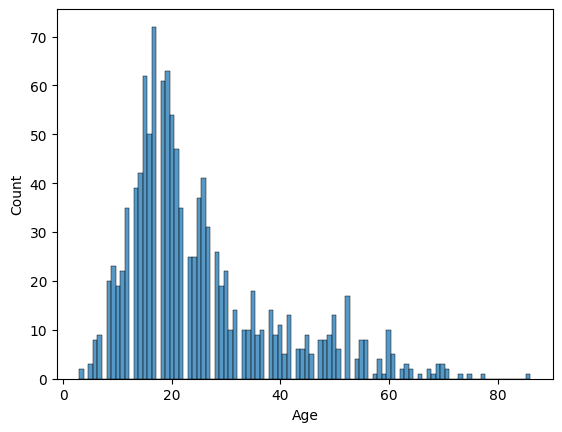

In [26]:
import seaborn as sns
sns.histplot(filtered_data_cleaned['Age'], bins=100)

In [27]:
filtered_data_cleaned['Time'].unique()

array(['10h30', '07h50', nan, '09h30', '15h30', '20h00', '14h00', '15h00',
       '10h10', 'Afternoon', '11h30', '07h00', '17h30', '14h50', '16h00',
       '10jh45', '13h12', '11h43', '10h00', 'Morning', '14h45', '12h00',
       '13h20', '06h40', '07h51', '11h00', '16h30', '16h39', '15h57',
       '14h30', '09h00', '10j30', '13h00', '11h45', '10h45', '08h15',
       '17h00', '08h00', '12h20', '10h50', '12h45', '11h55', '13h30',
       '07h30', '18h45', '17h45', 'Early afternoon', '13h15', '09h29',
       '15h40', '15h35', 'Late afternoon', '10h44', '13h19', '18h30',
       '12h30', '13h45', '10h43', '15h15', 1300, '14h30 / 15h30', '14h55',
       '08h30', '15h45', '18h00', '17h46', 'Morning ', '13h50', '16h20',
       '16h45', '19h00', '19h45', '19h30', 'Night', '16h40', '16h18',
       '11h10', '09h57', '11h15', '14h20', 'Just before noon', '07h56',
       '1600', '19h28', '15h50', '16h05', '06h30', '19h15', '08h45',
       '15h44', '10h15', '15j45', '20h30', '09h35', '10h27', '10h16'

In [28]:
filtered_data_cleaned['Time'].dtype

dtype('O')

In [29]:
def categorize_time(time):
    if pd.isna(time):  # Check if the value is NaN
        return np.nan

    # Convert to string
    time_str = str(time)

    # Extract hour from the time string
    if 'h' in time_str:
        hour = time_str.split('h')[0]  # Extract hour if 'h' separator is present
        if hour.isdigit():
            hour = int(hour)
        else:
            return np.nan  # Return NaN if hour is not a valid integer
    elif ':' in time_str:
        hour = time_str.split(':')[0]  # Extract hour if ':' separator is present
        if hour.isdigit():
            hour = int(hour)
        else:
            return np.nan  # Return NaN if hour is not a valid integer
    else:
        return np.nan  # Return NaN if neither separator is found

    # Categorize the time into MORNING, AFTERNOON, or EVENING
    if hour < 12:
        return 'MORNING'
    elif hour < 18:
        return 'AFTERNOON'
    else:
        return 'EVENING'

# Replace the values in the 'Time' column with the time categories
filtered_data_cleaned['Time'] = filtered_data_cleaned['Time'].apply(categorize_time)

<ipython-input-29-6af3ebcdaa2e>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_cleaned['Time'] = filtered_data_cleaned['Time'].apply(categorize_time)


In [30]:
# Calculate the total number of NaN values
total_nulls = filtered_data_cleaned['Time'].isnull().sum()

# Calculate the number of NaN values to fill for each category using the given ratios
afternoon_nulls = round((53/99) * total_nulls)
morning_nulls = round((32/99) * total_nulls)
evening_nulls = round((10/99) * total_nulls)

# Replace NaN values in 'Time' column with the ratios
filtered_data_cleaned['Time'].fillna('AFTERNOON', limit=afternoon_nulls, inplace=True)
filtered_data_cleaned['Time'].fillna('MORNING', limit=morning_nulls, inplace=True)
filtered_data_cleaned['Time'].fillna('EVENING', limit=evening_nulls, inplace=True)


<ipython-input-30-c85dd6a4a115>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_cleaned['Time'].fillna('AFTERNOON', limit=afternoon_nulls, inplace=True)
<ipython-input-30-c85dd6a4a115>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_cleaned['Time'].fillna('MORNING', limit=morning_nulls, inplace=True)
<ipython-input-30-c85dd6a4a115>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_cleaned['

In [31]:
filtered_data_cleaned['Time'].value_counts()

Time
AFTERNOON    691
MORNING      356
EVENING      110
Name: count, dtype: int64

<Axes: xlabel='Time', ylabel='Count'>

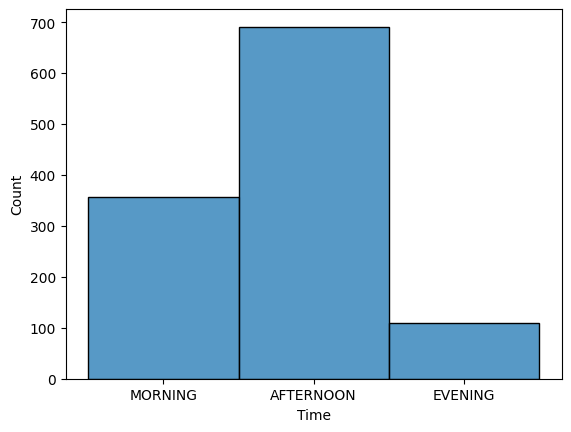

In [32]:
import seaborn as sns

sns.histplot(filtered_data_cleaned['Time'], bins=100)